In [3]:
import os
# os.environ['CUDA_VISIBLE_DEVICES']='0'
import time
from helper.model import *
from helper.data import *
import cv2


In [4]:
import os

# 檢查當前工作目錄
print("Current working directory:", os.getcwd())
print("Files in testset:", os.listdir('./'))

dataset = 'dataset_Membrane/'

# 列出 testset 資料夾中的文件
print("Files in testset:", os.listdir(dataset))

print("Files in testset:", os.listdir(dataset+'train_image'))
n_timage = len(os.listdir(dataset+'train_image'))
print(n_timage)
n_vimage = len(os.listdir(dataset+'val_image'))
print(n_vimage)

Current working directory: C:\Users\m9230\OneDrive - 財團法人國家實驗研究院\文件\GitHub_3\2024_NYCU_MI_course\240514
Files in testset: ['.ipynb_checkpoints', 'Cifar10_CNN.ipynb', 'dataset_Membrane', 'dataset_Mitochondrion', 'helper', 'U-net.ipynb', '__pycache__']
Files in testset: ['train_image', 'train_label', 'val_image', 'val_label']
Files in testset: ['0.png', '1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
30
31


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import math
tic = time.time()

BatchSize = 5    # batch_size 為 1 的訓練方法有時被稱為 隨機梯度下降
steps_per_epoch = 6     #try to add a code but not specify a number
validation_steps = 7     #try to add a code but not specify a number

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_set = trainGenerator(BatchSize, dataset,'train_image','train_label',data_gen_args,save_to_dir = None)

# val_set = testGenerator('dataset/val_image',30 , target_size = (512,512))

#### data_gen_args !!!

val_set = trainGenerator(BatchSize, dataset,'val_image','val_label', data_gen_args,save_to_dir = None)

# model = unet()
model = simple_unet_model()

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)  #alternative way
model_checkpoint = ModelCheckpoint('UNet_Membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

history = model.fit(train_set,steps_per_epoch=steps_per_epoch,epochs=5,callbacks=[model_checkpoint], validation_data=val_set, validation_steps = validation_steps)

toc = time.time()
print("Time=" + str((toc-tic)) + "sec")

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.7660Found 60 images belonging to 1 classes.
Found 60 images belonging to 1 classes.

Epoch 1: loss improved from inf to 0.69564, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 29s 5s/step - loss: 0.6956 - accuracy: 0.7660 - val_loss: 0.5907 - val_accuracy: 0.7421
Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.7209
Epoch 2: loss improved from 0.69564 to 0.55384, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 25s 4s/step - loss: 0.5538 - accuracy: 0.7209 - val_loss: 0.5975 - val_accuracy: 0.7529
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7349
Epoch 3: loss improved from 0.55384 to 0.53941, saving model to UNet_Membrane.hdf5
6/6 [==============================] - 25s 4s/step - loss: 0.5394 - 

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

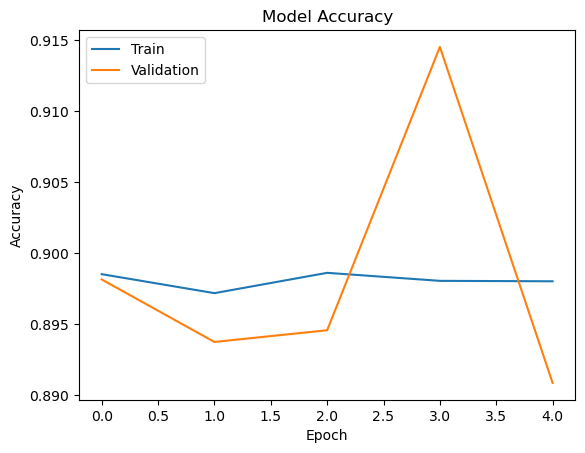

Text(0.5, 0, 'Epoch')

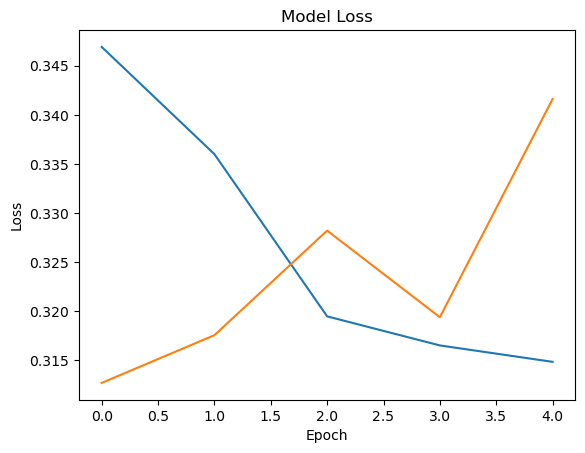

In [5]:
# 繪製訓練 & 驗證的準確率值
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

512
1/1 [==============================] - 0s 138ms/step
[[0.5261773  0.54400873 0.5496457  ... 0.5450902  0.5231731  0.52885926]
 [0.6786366  0.7886645  0.7360048  ... 0.70322174 0.6922406  0.6654204 ]
 [0.7485042  0.8183143  0.8056421  ... 0.7758672  0.7543624  0.6806274 ]
 ...
 [0.68252516 0.7652848  0.7861269  ... 0.71257985 0.7115941  0.6528127 ]
 [0.6756534  0.7249639  0.7585916  ... 0.71       0.7313818  0.6591938 ]
 [0.6288482  0.6479786  0.6437145  ... 0.61001664 0.60095483 0.5569121 ]]


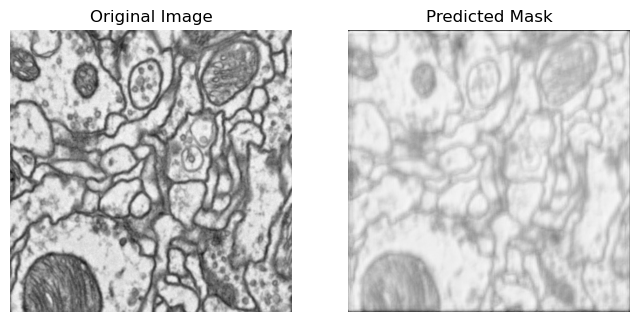

512
1/1 [==============================] - 0s 137ms/step
[[0.51862764 0.53239393 0.54097265 ... 0.52816504 0.5139662  0.5207796 ]
 [0.636785   0.7168702  0.6936981  ... 0.65272075 0.6425536  0.6147107 ]
 [0.68262863 0.73529273 0.7190366  ... 0.7124761  0.69200045 0.6281867 ]
 ...
 [0.70121366 0.74579734 0.75547165 ... 0.7206668  0.7316725  0.6399044 ]
 [0.6726483  0.7302304  0.74888456 ... 0.70022404 0.73472077 0.6568252 ]
 [0.6250505  0.6691898  0.6419595  ... 0.62045413 0.60914415 0.55464894]]


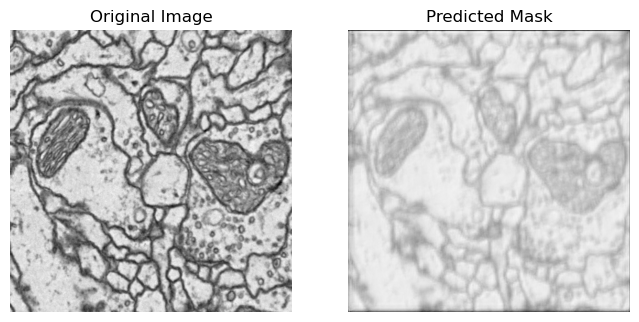

512
1/1 [==============================] - 0s 117ms/step
[[0.5213734  0.5331218  0.538479   ... 0.54477465 0.5160563  0.53066754]
 [0.6550177  0.75447106 0.7195936  ... 0.73457706 0.7160355  0.67359847]
 [0.72121185 0.7838287  0.76469034 ... 0.8069604  0.7797391  0.6912046 ]
 ...
 [0.7008748  0.7577963  0.7546528  ... 0.7343895  0.7438392  0.6326944 ]
 [0.6788474  0.7383834  0.74529386 ... 0.696442   0.74582225 0.66905046]
 [0.626559   0.6774292  0.6555169  ... 0.6195692  0.61748374 0.5597529 ]]


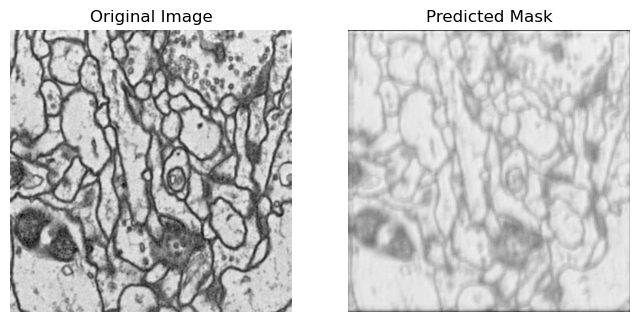

512
1/1 [==============================] - 0s 137ms/step
[[0.5234     0.54149514 0.54682934 ... 0.5357872  0.51748717 0.52829987]
 [0.6706442  0.78027165 0.73538107 ... 0.67133075 0.66471803 0.63756084]
 [0.7424141  0.80181915 0.79000044 ... 0.75362754 0.7251696  0.6510422 ]
 ...
 [0.7269194  0.79482347 0.7920551  ... 0.75087    0.7638911  0.66896474]
 [0.7158111  0.7734652  0.78352225 ... 0.7383849  0.7751511  0.6879232 ]
 [0.6513056  0.70618737 0.6751351  ... 0.64353096 0.6291074  0.5608871 ]]


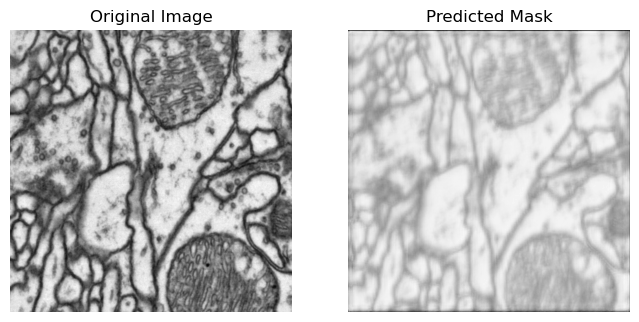

512
1/1 [==============================] - 0s 105ms/step
[[0.5191144  0.5336771  0.54336065 ... 0.55656093 0.52744275 0.5473919 ]
 [0.649982   0.750617   0.70522916 ... 0.76083595 0.7509278  0.70819753]
 [0.70836353 0.7611059  0.75802547 ... 0.8356765  0.8152391  0.7282623 ]
 ...
 [0.6560674  0.7238567  0.7227773  ... 0.73231107 0.7319572  0.65082145]
 [0.6473258  0.70624036 0.71257055 ... 0.7132798  0.7336108  0.66743624]
 [0.6039233  0.64807934 0.62462205 ... 0.61556536 0.6075534  0.55147415]]


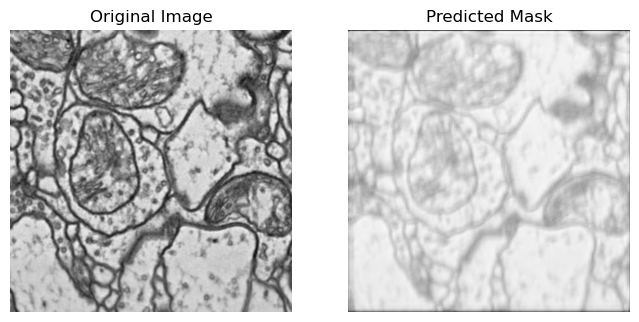

512
1/1 [==============================] - 0s 115ms/step
[[0.523098   0.5387638  0.5472528  ... 0.5376446  0.5250222  0.5331843 ]
 [0.6590116  0.76713336 0.72718364 ... 0.6898281  0.68222725 0.6502979 ]
 [0.7266738  0.78898865 0.7756721  ... 0.7510311  0.7384806  0.66556704]
 ...
 [0.64612633 0.69561607 0.68777955 ... 0.6878056  0.7046366  0.6168858 ]
 [0.6443086  0.67909855 0.68612975 ... 0.66044056 0.6961462  0.6337825 ]
 [0.59658194 0.63397294 0.60696983 ... 0.59510285 0.60209924 0.54711   ]]


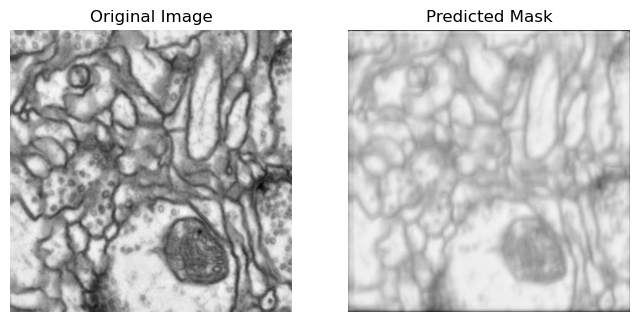

512
1/1 [==============================] - 0s 132ms/step
[[0.5144533  0.5225736  0.52744526 ... 0.5406399  0.5185982  0.52921885]
 [0.59544086 0.6649174  0.6398296  ... 0.7043414  0.69109434 0.653055  ]
 [0.6401538  0.68299353 0.6784782  ... 0.7851927  0.7555787  0.67071503]
 ...
 [0.64852226 0.7015771  0.71294504 ... 0.70786214 0.7261183  0.6386386 ]
 [0.6348442  0.678712   0.6984604  ... 0.6949607  0.7269304  0.6491382 ]
 [0.5954818  0.62428075 0.61006516 ... 0.6133992  0.61144745 0.5536944 ]]


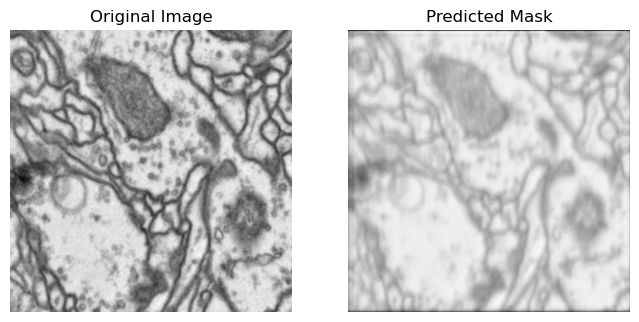

512
1/1 [==============================] - 0s 108ms/step
[[0.52023363 0.5359107  0.5379413  ... 0.5367732  0.5217636  0.52728724]
 [0.6425741  0.7273526  0.6824006  ... 0.69482744 0.68453944 0.647753  ]
 [0.7031272  0.76093435 0.7452963  ... 0.7699166  0.74113643 0.667309  ]
 ...
 [0.69758755 0.7593991  0.7552847  ... 0.72785795 0.73501205 0.6301149 ]
 [0.6855907  0.73757493 0.74320763 ... 0.7005173  0.7280942  0.65441805]
 [0.62744224 0.6791952  0.6518622  ... 0.614704   0.6111397  0.5558949 ]]


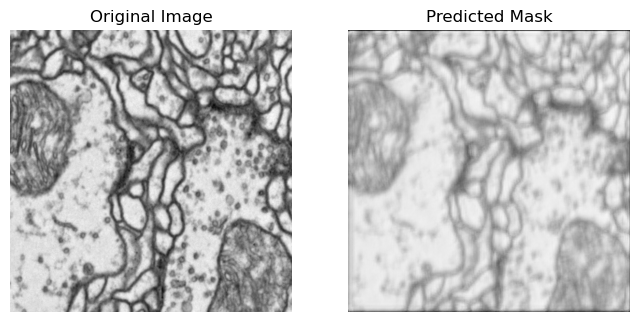

512
1/1 [==============================] - 0s 143ms/step
[[0.5183706  0.5310644  0.53292674 ... 0.533662   0.51890236 0.5257093 ]
 [0.6273496  0.71397233 0.6788346  ... 0.6963905  0.6812245  0.6414734 ]
 [0.68835753 0.7353054  0.7322355  ... 0.7584459  0.738496   0.65840626]
 ...
 [0.64741755 0.70903325 0.6957194  ... 0.71456826 0.7276024  0.64591473]
 [0.64603174 0.69558924 0.6883694  ... 0.70068467 0.73251784 0.66062284]
 [0.60112625 0.6474278  0.6261486  ... 0.62015444 0.6080861  0.5541068 ]]


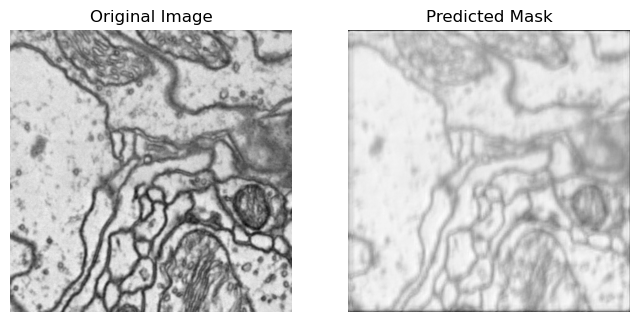

512
1/1 [==============================] - 0s 122ms/step
[[0.51439214 0.52019733 0.52478707 ... 0.5331011  0.5171166  0.52229804]
 [0.58474165 0.650783   0.61776745 ... 0.67284113 0.65716785 0.62931186]
 [0.6291555  0.66226727 0.66940784 ... 0.7357734  0.71107036 0.65099865]
 ...
 [0.6534538  0.6954892  0.68964064 ... 0.7156385  0.7264351  0.6390978 ]
 [0.64965206 0.6897195  0.6953427  ... 0.6972144  0.73289543 0.6579719 ]
 [0.6047093  0.6542161  0.61315054 ... 0.6157885  0.6069312  0.5509731 ]]


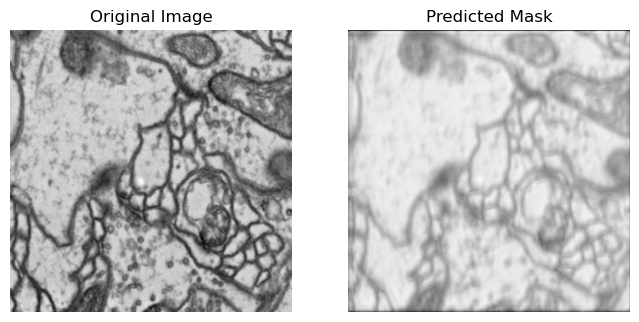

512
1/1 [==============================] - 0s 116ms/step
[[0.52362186 0.54072136 0.54936886 ... 0.55546194 0.5256387  0.5408415 ]
 [0.6685713  0.7742105  0.7327202  ... 0.7601267  0.7484336  0.7084349 ]
 [0.7408759  0.7929954  0.79011214 ... 0.85618454 0.8263013  0.7304872 ]
 ...
 [0.6927421  0.75916684 0.75268203 ... 0.7351215  0.74579906 0.65049833]
 [0.6862164  0.74145705 0.74745744 ... 0.7132513  0.75025433 0.6697541 ]
 [0.63193226 0.6841279  0.6509948  ... 0.6247826  0.61656266 0.5562514 ]]


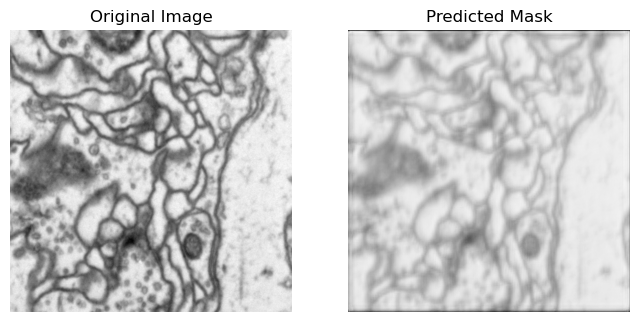

512
1/1 [==============================] - 0s 135ms/step
[[0.5203064  0.5332815  0.5403152  ... 0.54757416 0.52357143 0.53304595]
 [0.6441752  0.7367061  0.69628966 ... 0.72790617 0.7180737  0.6801101 ]
 [0.7056411  0.7568905  0.74932355 ... 0.81920016 0.7888094  0.7002781 ]
 ...
 [0.6781631  0.742209   0.7339941  ... 0.7009422  0.71486944 0.63510627]
 [0.6648942  0.7221419  0.727029   ... 0.6880787  0.7169401  0.6497483 ]
 [0.6154799  0.6630552  0.63708156 ... 0.61073583 0.59933645 0.55432045]]


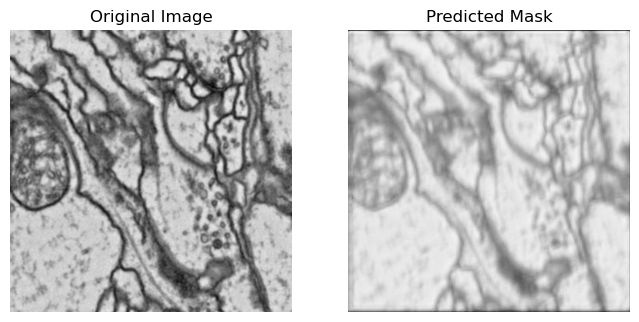

512
1/1 [==============================] - 0s 113ms/step
[[0.5160195  0.52350736 0.5310898  ... 0.5534265  0.52886057 0.540698  ]
 [0.60694253 0.67433333 0.6405215  ... 0.75756025 0.74504447 0.7019548 ]
 [0.655713   0.6987256  0.70227486 ... 0.8524483  0.81953216 0.7286086 ]
 ...
 [0.7065846  0.7843858  0.7776053  ... 0.7323761  0.7315776  0.64823323]
 [0.7009072  0.7617414  0.77212226 ... 0.710968   0.7423965  0.6670592 ]
 [0.6440036  0.69655    0.6658874  ... 0.61814713 0.61583394 0.5624818 ]]


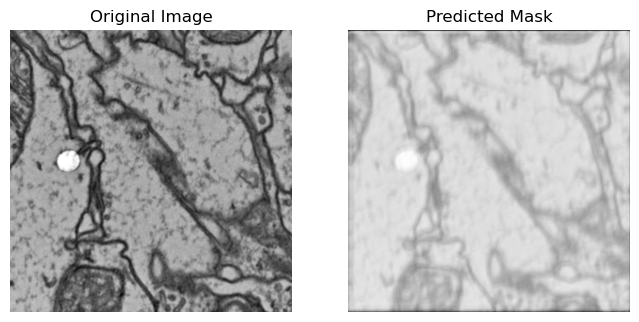

512
1/1 [==============================] - 0s 134ms/step
[[0.523058   0.5388559  0.54481566 ... 0.53814477 0.52222335 0.53157073]
 [0.66209435 0.7658042  0.7229572  ... 0.7024026  0.6940654  0.6524756 ]
 [0.7277726  0.7885     0.77887446 ... 0.77625424 0.75929326 0.67533344]
 ...
 [0.71254206 0.7695547  0.769276   ... 0.73491836 0.7472829  0.6464332 ]
 [0.6933143  0.74808717 0.75604284 ... 0.7104605  0.7437217  0.6661852 ]
 [0.6365223  0.68483174 0.6578464  ... 0.6242759  0.6156315  0.55822533]]


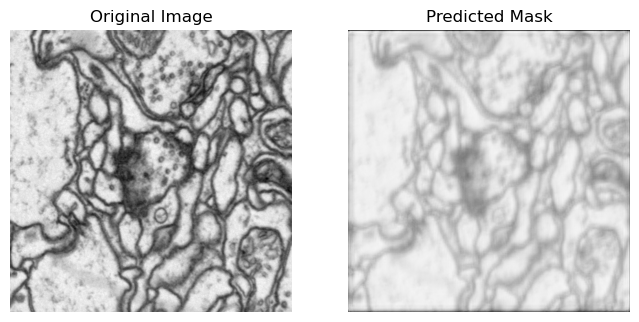

512
1/1 [==============================] - 0s 123ms/step
[[0.52330774 0.53761876 0.5445552  ... 0.5446067  0.5225989  0.5325322 ]
 [0.6597865  0.7588216  0.7125539  ... 0.72599787 0.7123054  0.671155  ]
 [0.72423035 0.78539765 0.7728768  ... 0.7972304  0.7765467  0.6915063 ]
 ...
 [0.67654353 0.737239   0.72079474 ... 0.7291733  0.73223305 0.6452281 ]
 [0.6730004  0.7297224  0.71759653 ... 0.7137658  0.7444129  0.6604827 ]
 [0.6196345  0.6706022  0.6461674  ... 0.625      0.61932915 0.5569885 ]]


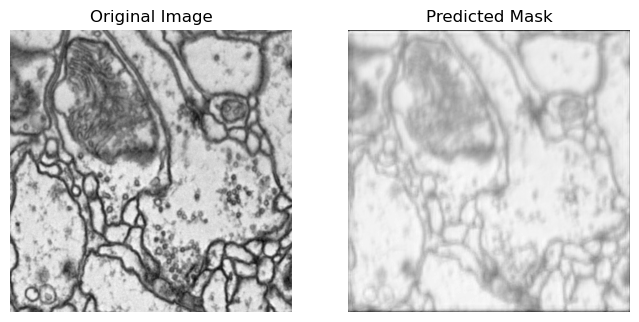

512
1/1 [==============================] - 0s 120ms/step
[[0.5236561  0.5421997  0.55570775 ... 0.5596678  0.5277977  0.54529744]
 [0.6746895  0.78510344 0.7501815  ... 0.77026266 0.7604586  0.71925336]
 [0.7452273  0.8053356  0.79910666 ... 0.8704173  0.83974326 0.74364674]
 ...
 [0.6890193  0.76318765 0.77316546 ... 0.76522213 0.77481997 0.663629  ]
 [0.6852503  0.748137   0.76340127 ... 0.73582125 0.7754825  0.6861671 ]
 [0.6339858  0.68311137 0.66451836 ... 0.63758665 0.6355556  0.56127095]]


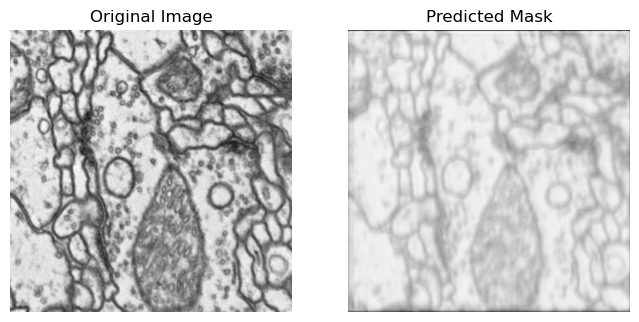

512
1/1 [==============================] - 0s 130ms/step
[[0.5226814  0.53754    0.54356617 ... 0.5368344  0.52254045 0.5274531 ]
 [0.66732216 0.7694685  0.72828174 ... 0.7121717  0.69841796 0.65734786]
 [0.73835146 0.8003422  0.7810745  ... 0.7890288  0.76634276 0.67582434]
 ...
 [0.7242452  0.78614414 0.7750323  ... 0.705278   0.72440225 0.63688475]
 [0.7102325  0.7681481  0.7691473  ... 0.67591774 0.71621287 0.6529715 ]
 [0.64849806 0.70573777 0.6697882  ... 0.61246145 0.6097834  0.55869013]]


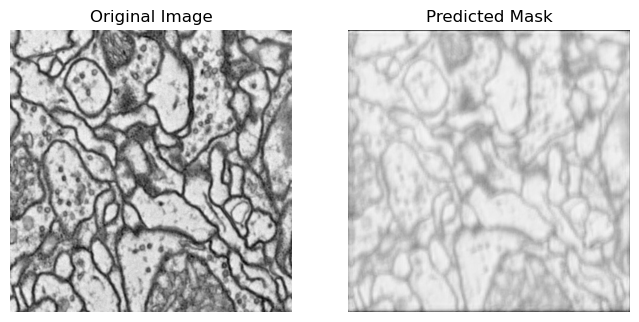

512
1/1 [==============================] - 0s 110ms/step
[[0.5156035  0.52662516 0.5310432  ... 0.539955   0.5189842  0.531159  ]
 [0.60598665 0.68147534 0.6470145  ... 0.6848533  0.6797832  0.64908373]
 [0.65295076 0.700577   0.7002776  ... 0.7558245  0.7359913  0.6631985 ]
 ...
 [0.6463271  0.7120599  0.70873684 ... 0.7427839  0.7564057  0.6501925 ]
 [0.6441909  0.6717854  0.6913597  ... 0.72383386 0.76428354 0.6773004 ]
 [0.59740776 0.6267124  0.6121992  ... 0.63412887 0.62379366 0.5561017 ]]


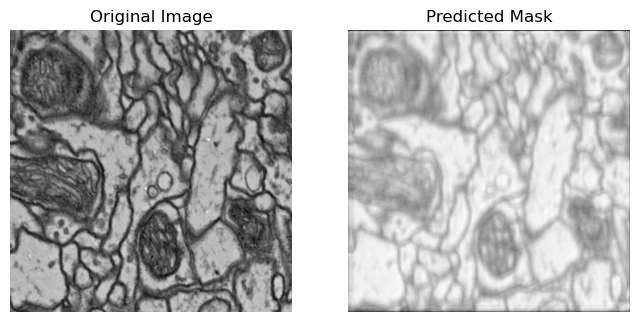

512
1/1 [==============================] - 0s 122ms/step
[[0.520391   0.5379405  0.54456997 ... 0.5490302  0.5243187  0.53473663]
 [0.6517284  0.7513925  0.7101444  ... 0.74092835 0.72841525 0.68748194]
 [0.70834595 0.77369153 0.7738117  ... 0.8252067  0.7972174  0.70746726]
 ...
 [0.6718887  0.7077701  0.7022718  ... 0.67164606 0.6845863  0.6100208 ]
 [0.6575819  0.6967652  0.69977826 ... 0.65803295 0.67979157 0.6207479 ]
 [0.6090868  0.6471278  0.6180535  ... 0.5928588  0.58440554 0.5460743 ]]


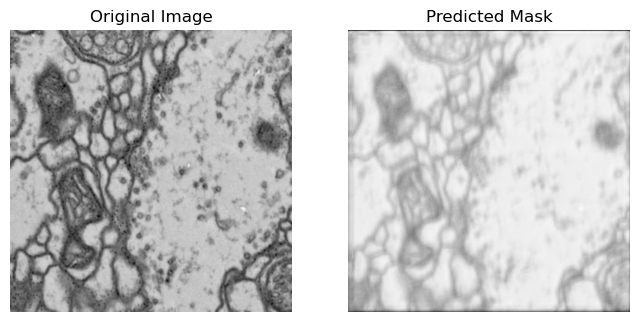

512
1/1 [==============================] - 0s 131ms/step
[[0.52046955 0.5269518  0.53637046 ... 0.55763745 0.5296152  0.5423615 ]
 [0.6293641  0.72615707 0.67787427 ... 0.77115136 0.7581874  0.716958  ]
 [0.69455963 0.756885   0.75850356 ... 0.86425847 0.8343903  0.74063206]
 ...
 [0.6823878  0.74379206 0.72988516 ... 0.7066435  0.7177299  0.6348902 ]
 [0.6770378  0.73136693 0.7324032  ... 0.6962089  0.72984797 0.65029955]
 [0.6244048  0.67879605 0.6446507  ... 0.6205441  0.60136074 0.54660434]]


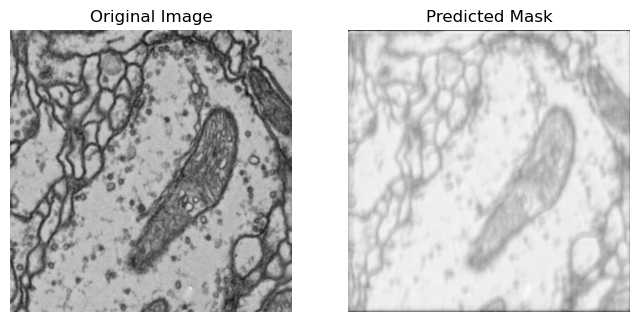

512
1/1 [==============================] - 0s 117ms/step
[[0.5228015  0.52905136 0.5272656  ... 0.5484526  0.5261027  0.53684676]
 [0.6235588  0.6633039  0.6369532  ... 0.7415626  0.7263055  0.6853049 ]
 [0.6749712  0.6964955  0.69694346 ... 0.8311329  0.7998112  0.7094219 ]
 ...
 [0.5959975  0.6427293  0.66245013 ... 0.72613233 0.7204958  0.62531155]
 [0.5966623  0.62562054 0.6452827  ... 0.6902388  0.72311366 0.6506196 ]
 [0.5750812  0.59404564 0.5801573  ... 0.607969   0.615096   0.5503069 ]]


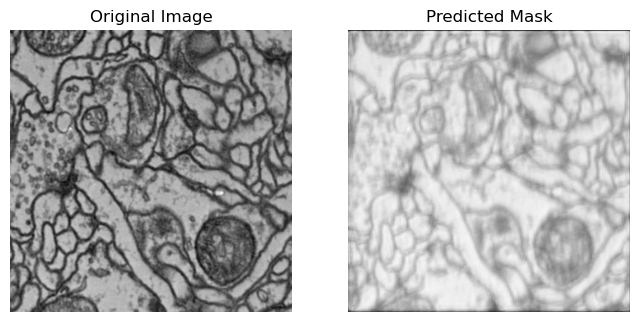

512
1/1 [==============================] - 0s 150ms/step
[[0.52681506 0.54544216 0.5519741  ... 0.54174566 0.5264598  0.53471   ]
 [0.68227285 0.7954582  0.7474747  ... 0.7092373  0.6969018  0.6632137 ]
 [0.75588477 0.81869864 0.8086411  ... 0.79208994 0.76212215 0.6846324 ]
 ...
 [0.7382571  0.8114019  0.8057667  ... 0.6981741  0.7083116  0.6114618 ]
 [0.72513664 0.7905995  0.79687715 ... 0.6638095  0.70881635 0.6314026 ]
 [0.6593611  0.71916217 0.68446887 ... 0.598353   0.6058762  0.5474877 ]]


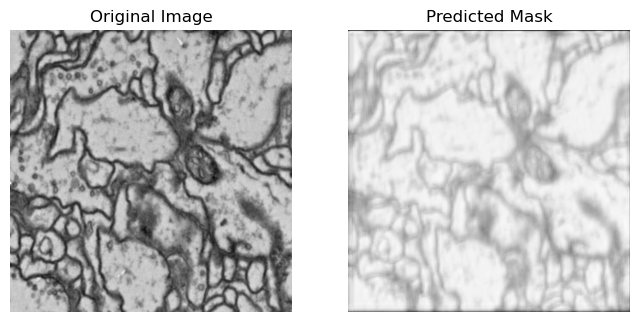

512
1/1 [==============================] - 0s 159ms/step
[[0.5215758  0.5393979  0.54434943 ... 0.54464656 0.5267991  0.53867763]
 [0.6623703  0.76718724 0.73580134 ... 0.71627194 0.7001182  0.6631526 ]
 [0.73000115 0.7932609  0.7763191  ... 0.78225577 0.76366955 0.68367827]
 ...
 [0.6912517  0.7262101  0.74604756 ... 0.6383517  0.65457594 0.59846455]
 [0.65825504 0.6820153  0.7038768  ... 0.6320999  0.653044   0.60261256]
 [0.6016136  0.6245805  0.6053722  ... 0.5799272  0.5759187  0.5367734 ]]


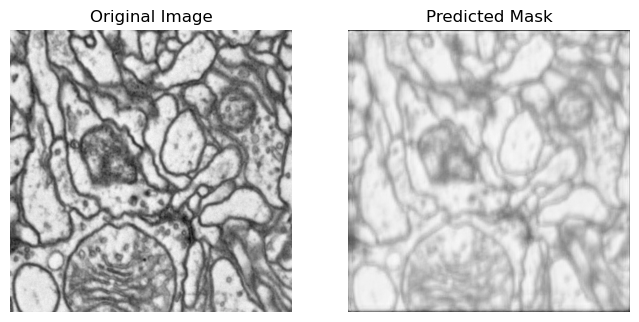

512
1/1 [==============================] - 0s 124ms/step
[[0.5229534  0.5405979  0.55075306 ... 0.5348022  0.5227504  0.5311086 ]
 [0.6596489  0.76445085 0.73646635 ... 0.6860301  0.6710726  0.64356095]
 [0.71815366 0.783274   0.7769228  ... 0.75387174 0.72572327 0.6595962 ]
 ...
 [0.6831772  0.7454658  0.7291258  ... 0.69622844 0.70092064 0.6169468 ]
 [0.67860603 0.7285166  0.72884417 ... 0.68273646 0.7089255  0.636459  ]
 [0.62318027 0.67588633 0.6430359  ... 0.6035331  0.59400344 0.5350997 ]]


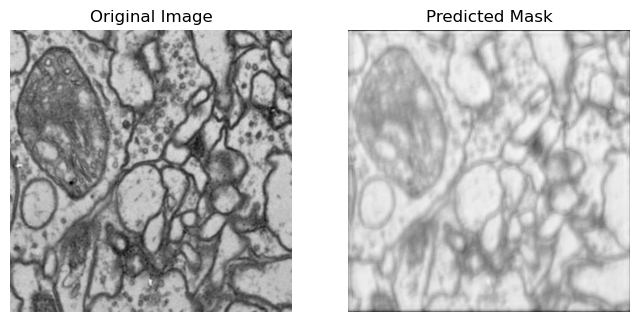

512
1/1 [==============================] - 0s 174ms/step
[[0.5231403  0.5384571  0.54656863 ... 0.53797114 0.51895016 0.527973  ]
 [0.6649566  0.7646169  0.71083635 ... 0.68890005 0.6806832  0.64239943]
 [0.72835714 0.7960582  0.78741896 ... 0.7648222  0.73466486 0.6609923 ]
 ...
 [0.6389293  0.68537563 0.69463205 ... 0.70894647 0.70267886 0.6318013 ]
 [0.62940884 0.65993917 0.68005526 ... 0.6912247  0.7112235  0.64402413]
 [0.58687353 0.61230755 0.595539   ... 0.6059288  0.5972224  0.5480821 ]]


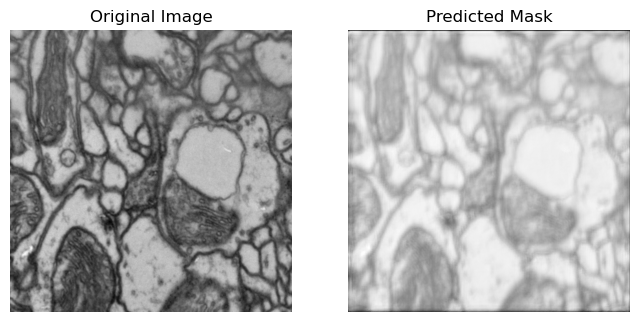

512
1/1 [==============================] - 0s 148ms/step
[[0.51835793 0.52482784 0.5381215  ... 0.55653745 0.5271633  0.5416218 ]
 [0.6172086  0.7006569  0.6685047  ... 0.76191235 0.7510108  0.7089163 ]
 [0.66911185 0.72016287 0.7303362  ... 0.85748655 0.8275402  0.7328835 ]
 ...
 [0.71864    0.78486574 0.7782811  ... 0.75030524 0.7635357  0.6642917 ]
 [0.7039698  0.7652877  0.7690261  ... 0.731989   0.7694033  0.6827483 ]
 [0.6440174  0.69980437 0.666643   ... 0.6384365  0.6292872  0.5617397 ]]


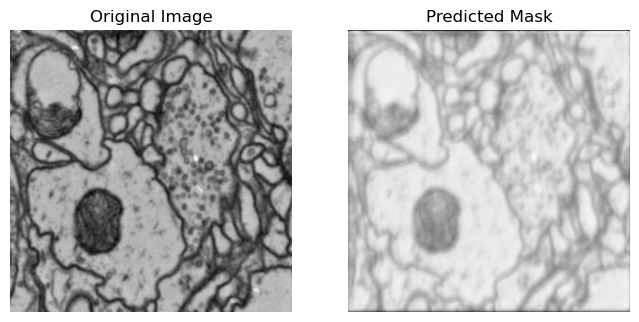

512
1/1 [==============================] - 0s 161ms/step
[[0.52278894 0.53763634 0.5440401  ... 0.53504497 0.5179358  0.52431923]
 [0.6616498  0.76492333 0.7229049  ... 0.6796273  0.6659374  0.6372194 ]
 [0.73003244 0.78734505 0.77540445 ... 0.7520671  0.7262884  0.65043676]
 ...
 [0.6200748  0.64740354 0.63848656 ... 0.7095405  0.71463794 0.62475234]
 [0.61711663 0.6419132  0.6381611  ... 0.676612   0.72029907 0.6443588 ]
 [0.5789156  0.61061907 0.5842796  ... 0.6101243  0.6098369  0.5531091 ]]


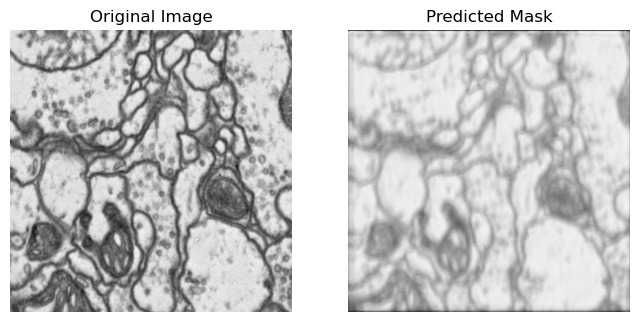

512
1/1 [==============================] - 0s 151ms/step
[[0.51604843 0.5288359  0.53308046 ... 0.52823985 0.5148446  0.5215024 ]
 [0.6106207  0.6948831  0.6601539  ... 0.6469645  0.63720894 0.61014473]
 [0.6614618  0.7075958  0.7092683  ... 0.7098519  0.68638986 0.6231406 ]
 ...
 [0.63809425 0.68607306 0.68651384 ... 0.6646094  0.67431164 0.5958424 ]
 [0.62819403 0.66947657 0.6794517  ... 0.6420093  0.67841023 0.61308664]
 [0.58862394 0.6233249  0.599662   ... 0.58083105 0.5829323  0.53585565]]


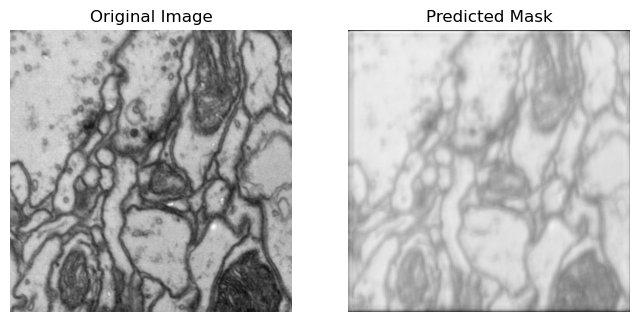

512
1/1 [==============================] - 0s 136ms/step
[[0.5186322  0.5257974  0.5326523  ... 0.5543416  0.5255425  0.53865296]
 [0.633411   0.7214028  0.6759058  ... 0.7555674  0.74672645 0.7005041 ]
 [0.6942492  0.7602312  0.7479995  ... 0.84275746 0.8161923  0.7231774 ]
 ...
 [0.6883805  0.7493327  0.7305387  ... 0.72714305 0.7451791  0.6479738 ]
 [0.67746085 0.73733956 0.7253724  ... 0.7100106  0.7464928  0.6607345 ]
 [0.6265721  0.6767961  0.64499784 ... 0.6248652  0.6230828  0.55157644]]


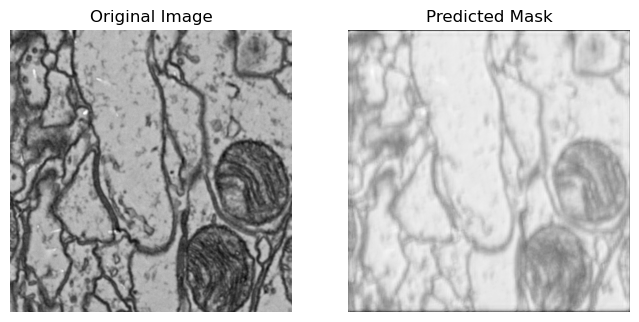

512
1/1 [==============================] - 0s 113ms/step
[[0.5213909  0.5359097  0.5433415  ... 0.5518836  0.5249306  0.5377469 ]
 [0.65032536 0.74985904 0.706783   ... 0.74428785 0.7342883  0.6947493 ]
 [0.71748936 0.77629596 0.76157796 ... 0.8384721  0.8074739  0.7169988 ]
 ...
 [0.6807477  0.74335617 0.737955   ... 0.661078   0.67020017 0.5996235 ]
 [0.6700785  0.7243963  0.7299802  ... 0.6479585  0.6744948  0.61227876]
 [0.6179857  0.6657046  0.6400642  ... 0.5856775  0.580355   0.5343503 ]]


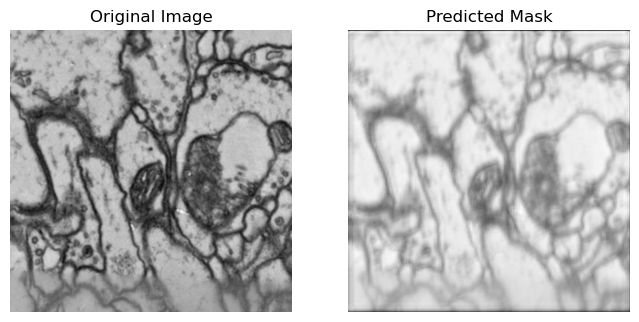

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
# 設置圖像尺寸和路徑
img_size = (512, 512)  # 設定成模型訓練時使用的圖像尺寸
test_path = dataset + 'train_image'  # 測試圖像文件夾的路徑

# 獲取測試圖像文件列表
test_images = os.listdir(test_path)


# 預處理圖像並預測
for image_name in test_images:
    img_path = os.path.join(test_path, image_name)
    img = load_img(img_path, target_size=img_size, color_mode='grayscale')  # 確保讀取模式與訓練時相同
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # 正規化
    print(len(img_array))
    img_array = np.expand_dims(img_array, axis=0)  # 增加"批次"維度 : 原圖(512, 512, 1) 加入批次項 => (1, 512, 512, 1) 才能代入model.predict

    # 預測結果
    prediction = model.predict(img_array)
    predicted_image = prediction[0, :, :, 0]  # 獲取預測圖像

    print(predicted_image)

    # 假設 predicted_image 是模型的輸出
    # binary_mask  = cv2.threshold(predicted_image, 0.5, 1, cv2.THRESH_BINARY)[1]  #
    # predicted_image =binary_mask*255
    # print(predicted_image)
   
    # 視覺化原始圖像和預測結果
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted_image, cmap='gray')
    plt.axis('off')

    plt.show()


In [7]:
# val_gen = ImageDataGenerator().flow_from_directory(
#     dataset,
#     classes=['train_image'],
#     class_mode=None,
#     color_mode="grayscale",
#     target_size=(512, 512),
#     batch_size=1,
#     seed=5)

# for img in val_gen:
#     img_processed = img / 255.0
#     pred = model.predict(img_processed)
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.title('Original Image')
#     plt.imshow(img[0])
#     plt.subplot(1, 2, 2)
#     plt.title('Predicted Mask')
#     plt.imshow(pred[0, :, :, 0], cmap='gray')
#     plt.show()
#     # break  # Show one example


## Exercise : try to rebuild a deeper unet model 